# **Import the Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import recall_score, classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# **Data Exploration and Understanding**

## **Load the Data**

In [ ]:
# Read the CSV file "Telco-Customer-Churn.csv" into a Pandas DataFrame and assign it to the variable 'df'
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
# Display the first five rows of the DataFrame 'df' to inspect the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **Understand Data Structure and Characteristics**

### ***Dataset Shape***

In [ ]:
# Get the number of rows and columns in the DataFrame 'df'
shape_of_df = df.shape
print(f"Instances: {shape_of_df[0]}\nFeatures: {shape_of_df[1]}")

Instances: 7043
Features: 21


### ***Dataset Type***

In [ ]:
# Display the data types of each column in the DataFrame 'df'
data_types_of_df = df.dtypes
print(data_types_of_df)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


**Analysis:**

* The dataset appears to contain a mix of categorical and numerical features.
* The data types seem appropriate for most columns, but there might be an issue with the TotalCharges column, which should ideally be a numerical type.

* We weill do further exploration to understand and handle any missing values or inconsistencies in the data.

* Depending on our analysis goals, encoding categorical variables and converting TotalCharges to a numerical type is necessary.

### ***Numerical vs Categorical Features***

In [ ]:
# Extracting Numerical Features from the DataFrame 'df' and displaying their column names
numerical_features = df.select_dtypes(include=[np.number])
print(numerical_features.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


In [ ]:
# Extracting Categorical Features from the DataFrame 'df' and displaying their column names
categorical_features = df.select_dtypes(include=[object])
print(categorical_features.columns)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


### ***Descriptive Statistics***

In [ ]:
# Generate descriptive statistics for the DataFrame 'df'
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7034.000000,7043.000000
mean,0.162147,32.362951,64.761692
std,0.368612,24.565209,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**1. Count:**
* The count row shows the number of non-null values for each numerical column.
* All three columns (SeniorCitizen, tenure, and MonthlyCharges) have 7043 non-null values, indicating that there are no missing values in these columns.

**2. Mean:**

* The mean row represents the average value of each numerical column.

* For example, the mean SeniorCitizen value is approximately 0.162, suggesting that, on average, around 16.2% of customers are senior citizens.
* The mean tenure value is approximately 32.37, indicating the average number of months a customer has stayed with the service.
* The mean MonthlyCharges value is approximately 64.76, representing the average monthly charges.

**3. Standard Deviation (std):**

* The std row shows the standard deviation, which is a measure of the amount of variation or dispersion in the data.
* For instance, the standard deviation for SeniorCitizen is approximately 0.369, indicating the degree of variability in the percentage of senior citizens among customers.

**4: Min, 25%, 50%, 75%, Max:**

* These rows represent specific percentiles of the data distribution.
* The minimum (min) value is the smallest value in the dataset.
* The 25th percentile (25% or Q1) is the value below which 25% of the data falls.
* The median (50% or Q2) is the middle value, separating the higher half from the lower half of the dataset.
* The 75th percentile (75% or Q3) is the value below which 75% of the data falls.
* The maximum (max) value is the largest value in the dataset.

**Interpretation:**

* The data indicates that most customers are not senior citizens (as suggested by the low mean and 25th, 50th, and 75th percentiles of SeniorCitizen being 0).
* On average, customers stay for around 32 months, with a considerable range from 0 to 72 months (min to max).
* 75% customers have tenure less than 55 months.
* Monthly charges vary, with an average around \$64.76. The charges range from \$18.25 to \$118.75.

### ***Customer Churn Statistics***

In [ ]:
# Calculate churn counts and percentages
churn_counts = df['Churn'].value_counts()
churn_percentages = churn_counts / len(df['Churn']) * 100

# Display churn counts
print(f"Churn counts:\n{churn_counts}")

# Display churn percentages
print(f"\nChurn percentages:\n{churn_percentages.rename('Percentage')}")

# Display total churned customers
print(f"\nTotal churned customers: {churn_counts.sum()}")

Churn counts:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn percentages:
Churn
No     73.463013
Yes    26.536987
Name: Percentage, dtype: float64

Total churned customers: 7043


* The output revels that there are:
5174 customers who did not churn `("No")`

* 1869 customers who churned `("Yes")`

### ***Dataset Summary***

In [ ]:
# Display a concise summary of the DataFrame with detailed information about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7042 non-null   object 
 4   Dependents        7039 non-null   object 
 5   tenure            7034 non-null   float64
 6   PhoneService      6997 non-null   object 
 7   MultipleLines     7029 non-null   object 
 8   InternetService   7037 non-null   object 
 9   OnlineSecurity    7036 non-null   object 
 10  OnlineBackup      7035 non-null   object 
 11  DeviceProtection  7041 non-null   object 
 12  TechSupport       7039 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7039 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### ***Visualizing Missing Data Percentage***

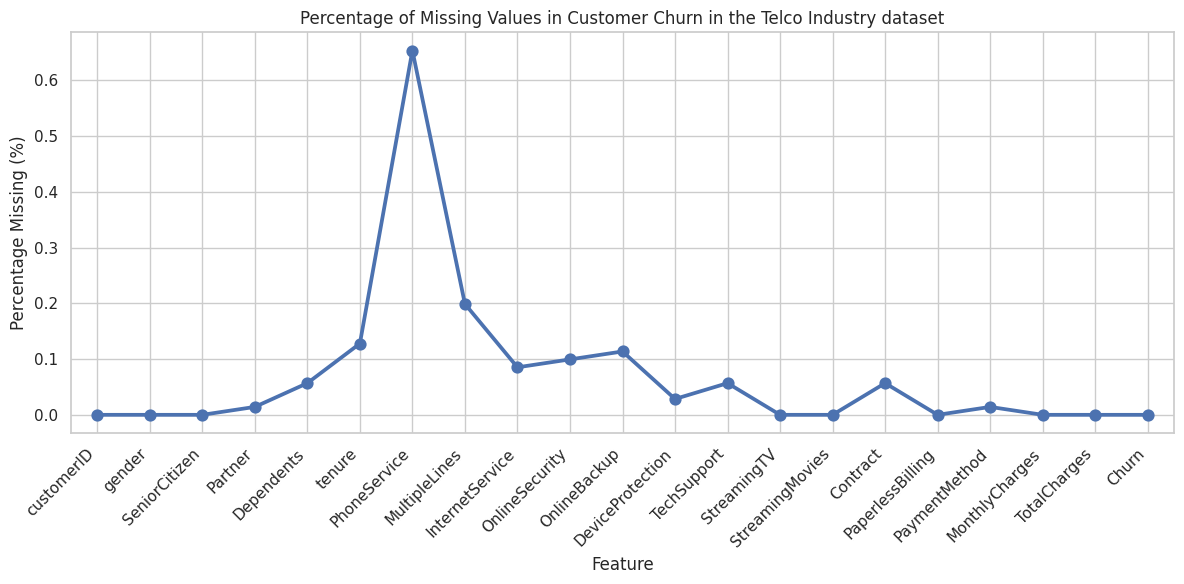

In [ ]:
# Calculate missing value percentages
missing_percentages = (df.isnull().sum() * 100) / df.shape[0]

# Create DataFrame for visualization
missing_df = pd.DataFrame({
    "Feature": missing_percentages.index,
    "Percentage Missing": missing_percentages.values
})

# Set figure size for better readability
plt.figure(figsize=(12, 6))

# Create point plot with Seaborn
ax = sns.pointplot(x="Feature", y="Percentage Missing", data=missing_df)

# Rotate and style x-axis labels for clarity
plt.xticks(rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Percentage Missing (%)")

# Customize title and add gridlines
df.name = "Customer Churn in the Telco Industry dataset"
plt.title("Percentage of Missing Values in {}".format(df.name))
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              1
Dependents           4
tenure               9
PhoneService        46
MultipleLines       14
InternetService      6
OnlineSecurity       7
OnlineBackup         8
DeviceProtection     2
TechSupport          4
StreamingTV          0
StreamingMovies      0
Contract             4
PaperlessBilling     0
PaymentMethod        1
MonthlyCharges       0
TotalCharges         0
Churn                0
dtype: int64

In [ ]:
#write a code to eliminate missing values from the dataset
df.dropna(inplace=True)

In [ ]:
#check for the missing values after elimination
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Thats Great! we are getting no null values

In [ ]:
#shape of the dataset after removing the missing values
df.shape

(6948, 21)

### ***Detect outliers in numerical columns (e.g., 'tenure' and 'MonthlyCharges')***

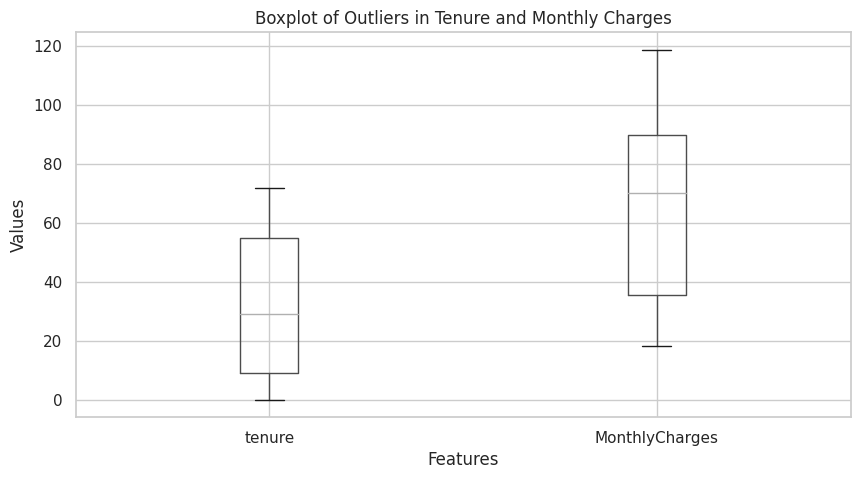

In [ ]:
# Specify numerical features of interest
numerical_features = ["tenure", "MonthlyCharges"]

# Extract relevant columns for analysis
numerical_df = df[numerical_features]

# Generate a boxplot to visualize outliers
numerical_df.boxplot(figsize=(10, 5))

# Optionally, add title and labels for clarity
plt.title("Boxplot of Outliers in Tenure and Monthly Charges")
plt.xlabel("Features")
plt.ylabel("Values")

# Display the plot
plt.show()

There are no outliers in the numerical features.

# **Data Cleaning and Preprocessing**

### ***Data Transformation***


***Data Transformation: Convert 'TotalCharges' to Numeric***

***1: Identifying and Displaying Non-Numeric Values in 'TotalCharges'***

In [ ]:
# Identify non-numeric values in 'TotalCharges'
non_numeric_values = df['TotalCharges'][~df['TotalCharges'].str.isnumeric()]


# Display the non-numeric values
print("Non-numeric values in 'TotalCharges':")
print(non_numeric_values)

Non-numeric values in 'TotalCharges':
0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7037     1419.4
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
Name: TotalCharges, Length: 6627, dtype: object


***2: Handling Non-Numeric Values in 'TotalCharges'***

In [ ]:
# Convert 'TotalCharges' to numeric, replacing non-numeric values with NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Impute NaN values with the mean of the column
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

**Prepare the 'TotalCharges' column for numerical analysis by ensuring that all values are numeric.**

### ***Removing Unnecessary Columns***

In [ ]:
# Remove 'customerID' and 'tenure' columns from the DataFrame
df.drop(['customerID', 'tenure'], axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## ***Handling Categorical Target Variable***

In [ ]:
# Convert the target variable 'Churn' to a binary numeric variable: Yes=1, No=0
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## ***Handling Categorical Variables***

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming df contains your DataFrame with categorical variables
df_encoded = df.copy()  # Make a copy to preserve original DataFrame

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column in DataFrame
for column in df_encoded.columns:
    # Check if the column is categorical
    if df_encoded[column].dtype == 'object':
        # Fit label encoder and transform values
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Now df_encoded contains encoded values instead of categorical ones
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# **Exploratory Data Analysis (EDA)| Visualization and Insights**

### ***Visualize the distribution of 'Churn' in the dataset***

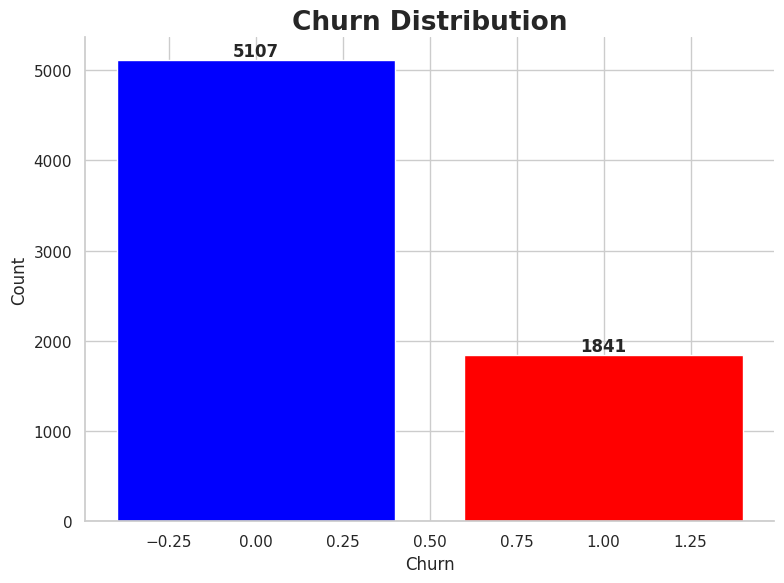

In [ ]:
# Get the value counts for 'Churn' column
data_temp = df['Churn'].value_counts().sort_index()

# Create a bar chart with annotations and different colors
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(data_temp.index, data_temp, color=['blue', 'red'])

# Title and axis labels
ax.set_title('Churn Distribution', fontsize=19, fontweight='bold')
ax.set_xlabel('Churn')
ax.set_ylabel('Count')

# Annotate each bar with its count value
for i, count in enumerate(data_temp):
    ax.text(i, count + 50, str(count), ha='center', fontsize=12, fontweight='bold')

# Remove spines on top and right sides
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Display the plot
plt.tight_layout()
plt.show()

**The "No" category ("No churn") has significantly more customers (5174) compared to the "Yes" category ("Churn") with 1869 customers. This means the ratio of non-churned to churned customers is roughly 2.8:1.**

### ***Visualize the count of 'Churn' for each 'gender'***

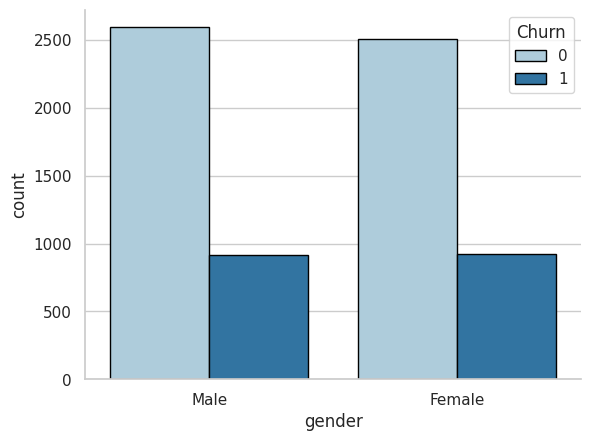

In [ ]:
# Visualize the count of 'Churn' for each 'gender' using Seaborn countplot
sns.countplot(x='gender', hue="Churn", data=df, palette="Paired", edgecolor = 'Black', order=df['gender'].value_counts().index)
sns.despine()

-----> Yes = 1

-----> No = 0

### ***Visualize the count of 'Churn' for each 'SeniorCitizen'***

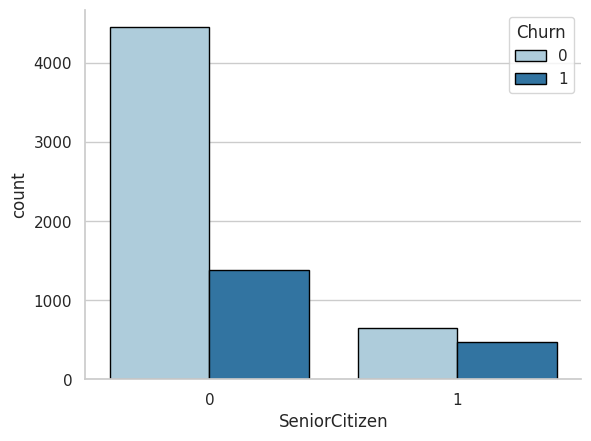

In [ ]:
# Visualize the count of 'Churn' for each 'SeniorCitizen' using Seaborn countplot
sns.countplot(x='SeniorCitizen', hue="Churn", data=df, palette="Paired", edgecolor = 'Black', order=df['SeniorCitizen'].value_counts().index)
sns.despine()

### ***Visualize the count of 'Churn' for each 'Partner'***

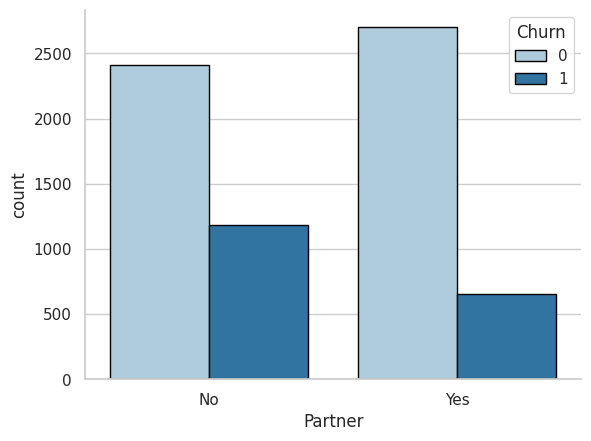

In [ ]:
# Visualize the count of 'Churn' for each 'Partner' using Seaborn countplot
sns.countplot(x='Partner', hue="Churn", data=df, palette="Paired", edgecolor = 'Black', order=df['Partner'].value_counts().index)
sns.despine()

### ***Visualize the count of 'Churn' for each 'Dependents' category***

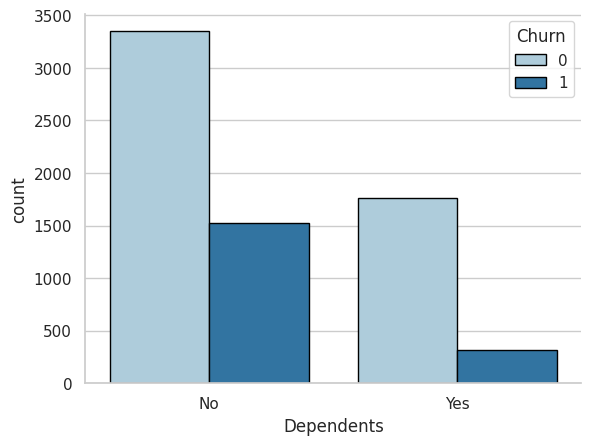

In [ ]:
# Visualize the count of 'Churn' for each 'Dependents' category using Seaborn countplot
sns.countplot(x='Dependents', hue="Churn", data=df, palette="Paired", edgecolor = 'Black', order=df['Dependents'].value_counts().index)
sns.despine()

### ***Visualize the count of 'Churn' for each 'Payment Method' category***

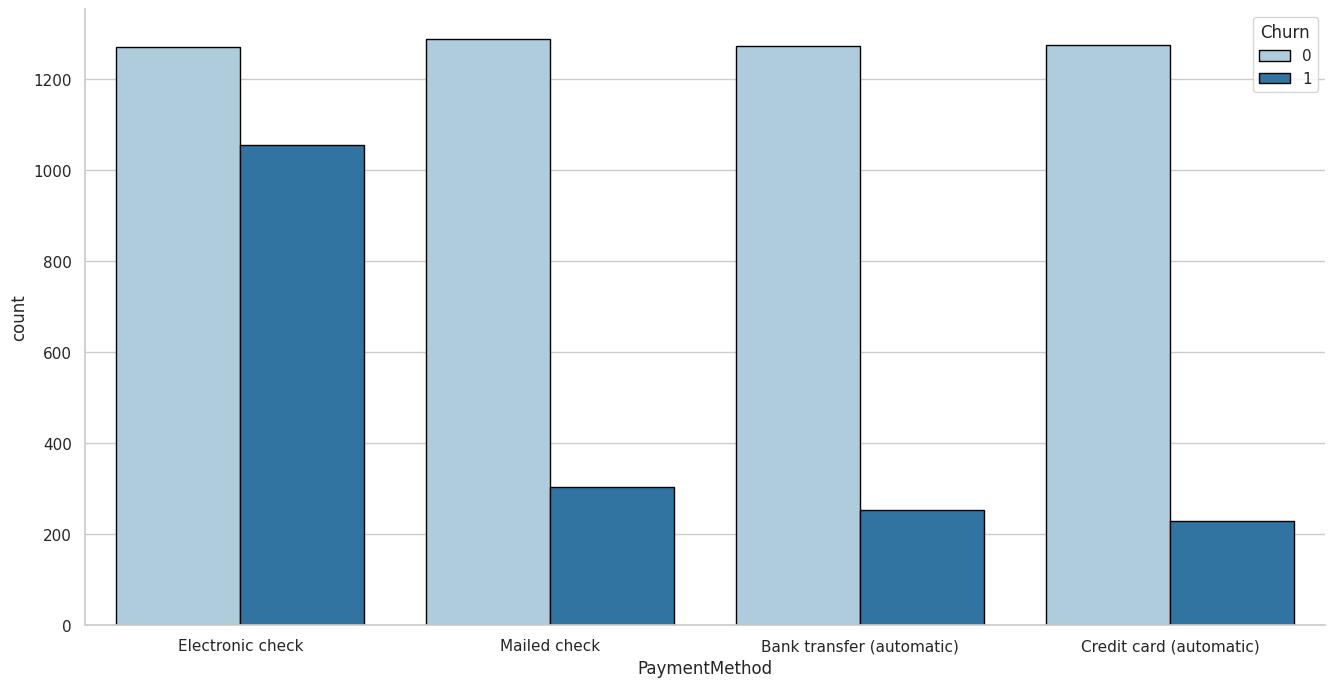

In [ ]:
# Visualize the count of 'Churn' for each 'Contract' category using Seaborn countplot
plt.figure(figsize=(16, 8))
sns.countplot(x='PaymentMethod', hue="Churn", data=df, palette="Paired", edgecolor='Black', order=df['PaymentMethod'].value_counts().index)
sns.despine()

### ***Visualize the count of 'Churn' for each 'Contract' category***

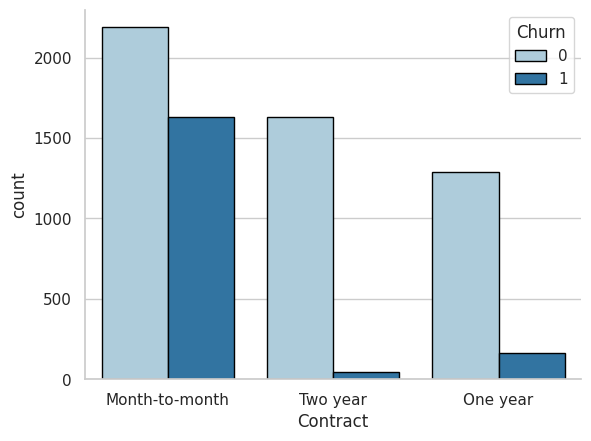

In [ ]:
# Visualize the count of 'Churn' for each 'Contract' category using Seaborn countplot
sns.countplot(x='Contract', hue="Churn", data=df, palette="Paired", edgecolor = 'Black', order=df['Contract'].value_counts().index)
sns.despine()

### ***Visualize the count of 'Churn' for each 'TechSupport' category***

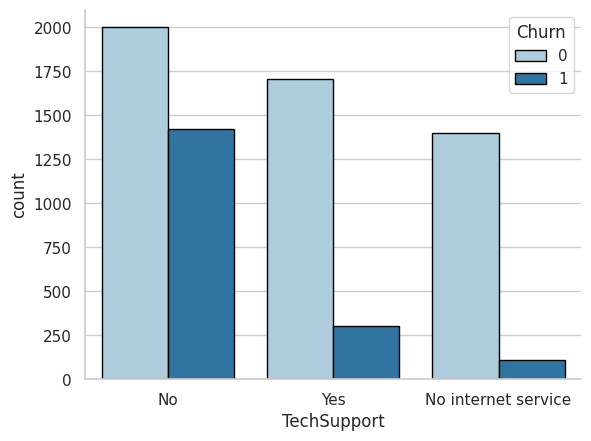

In [ ]:
# Visualize the count of 'Churn' for each 'TechSupport' category using Seaborn countplot
sns.countplot(x='TechSupport', hue="Churn", data=df, palette="Paired", edgecolor = 'Black', order=df['TechSupport'].value_counts().index)
sns.despine()

**Analysis:**
* Electronic check medium are the highest churners
* Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
* No Online security, No Tech Support category are high churners
* Non senior Citizens are high churners

### ***Visualize the distribution of monthly charges for Churn and Not Churn***

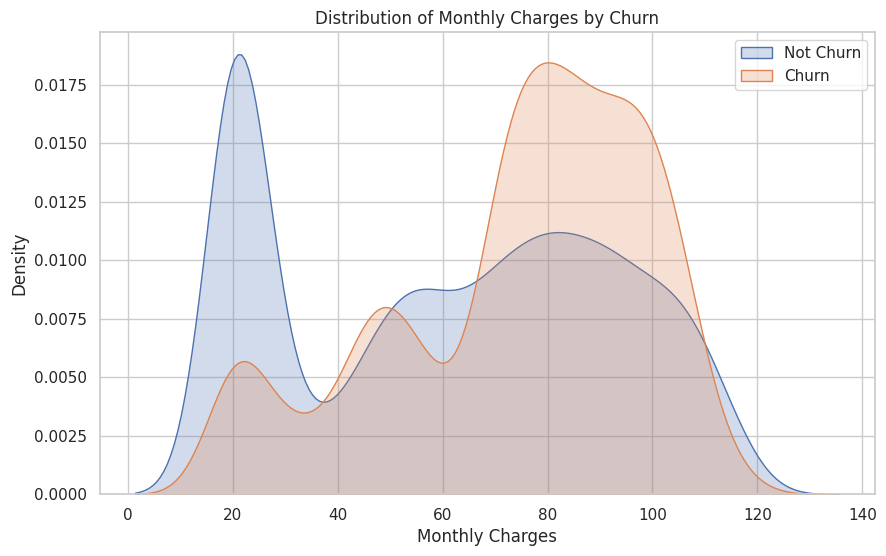

In [ ]:
# Visualize the distribution of monthly charges for Churn and Not Churn using Seaborn kdeplot

# Set the figure size for better readability
plt.figure(figsize=(10, 6))

# Create a kernel density plot for 'MonthlyCharges' based on Churn status
ax = sns.kdeplot(df['MonthlyCharges'][df['Churn'] == 0], fill=True)
ax = sns.kdeplot(df['MonthlyCharges'][df['Churn'] == 1], ax=ax, fill=True)

# Add legend for better interpretation
ax.legend(["Not Churn", "Churn"], loc='upper right')

# Set labels and title
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of Monthly Charges by Churn')

# Display the plot
plt.show()

### ***Visualize the distribution of total charges for Churn and Not Churn***

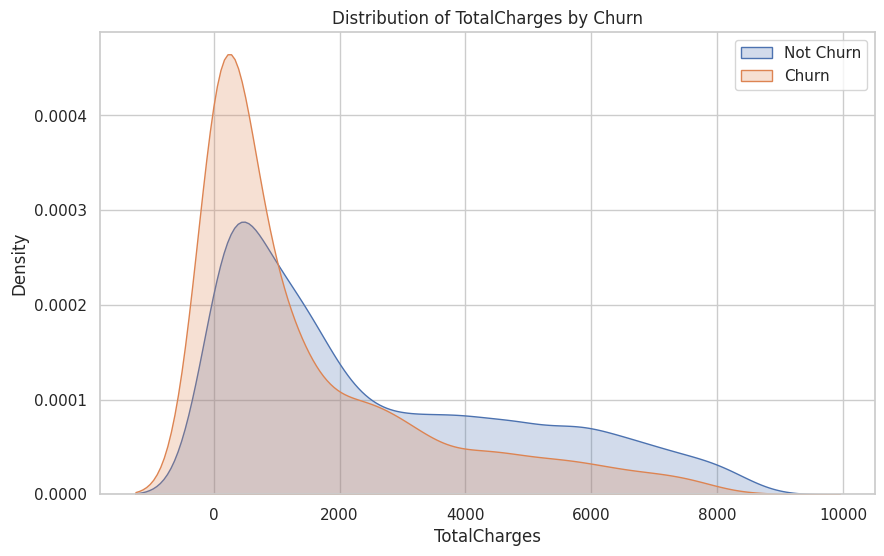

In [ ]:
# Visualize the distribution of total charges for Churn and Not Churn using Seaborn kdeplot

# Set the figure size for better readability
plt.figure(figsize=(10, 6))

# Create a kernel density plot for 'TotalCharges' based on Churn status
ax = sns.kdeplot(df['TotalCharges'][df['Churn'] == 0], fill=True)
ax = sns.kdeplot(df['TotalCharges'][df['Churn'] == 1], ax=ax, fill=True)

# Add legend for better interpretation
ax.legend(["Not Churn", "Churn"], loc='upper right')

# Set labels and title
ax.set_ylabel('Density')
ax.set_xlabel('TotalCharges')
ax.set_title('Distribution of TotalCharges by Churn')

# Display the plot
plt.show()

### ***Visualize relationship between Monthly Charges and Total Charges***

<Figure size 1000x600 with 0 Axes>

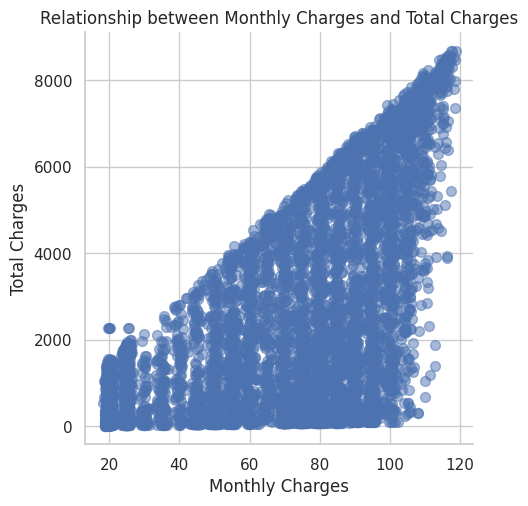

In [ ]:
# Set style
sns.set(style="whitegrid")

# Set figure size
plt.figure(figsize=(10, 6))

# Create lmplot with custom styling
lmplot = sns.lmplot(data=df, x='MonthlyCharges', y='TotalCharges', fit_reg=False, scatter_kws={'s': 50, 'alpha': 0.5})

# Customize labels and title
lmplot.set_axis_labels("Monthly Charges", "Total Charges")
plt.title("Relationship between Monthly Charges and Total Charges")

# Show the plot
plt.show()

**Total Charges increase as Monthly Charges increases.**

**1. Higher Churn at Lower Total Charges:**

The initial observation highlights a surprising trend where higher churn is associated with lower total charges.

**2. Combined Insights:**

By combining insights from Tenure, Monthly Charges, and Total Charges, a clearer picture emerges.
Higher Monthly Charges at lower tenure results in lower Total Charges.

**3. Link to High Churn:**

The combination of Higher Monthly Charges, Lower tenure, and Lower Total Charges is identified as linked to high churn.

**Interpretation:**

The interplay of these factors suggests that customers with shorter tenures and higher monthly charges may churn before accumulating higher total charges.
This could be indicative of dissatisfaction or a need for optimization in pricing plans or customer onboarding processes.

Understanding these relationships is valuable for devising strategies to reduce churn, potentially by addressing pricing concerns, enhancing the early customer experience, or implementing targeted retention initiatives.

**Build a corelation of all predictors with 'Churn'**

<Axes: >

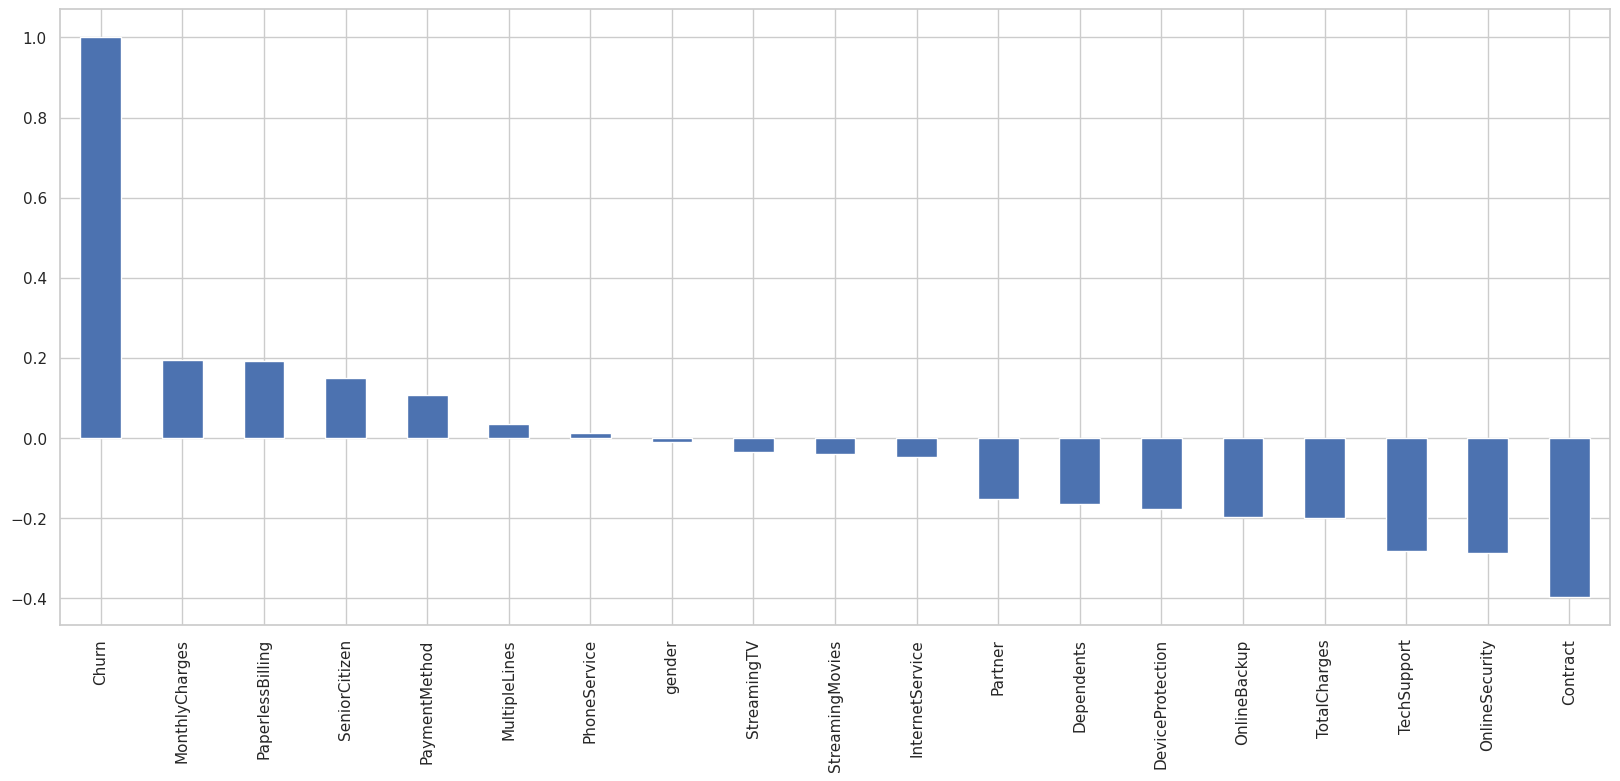

In [ ]:
plt.figure(figsize=(20,8))
df_encoded.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**High Churn:**

- **Month-to-Month Contracts:** Customers with month-to-month contracts exhibit high churn rates.
- **No Online Security and No Tech Support:** Customers lacking online security and tech support are more likely to churn.
- **First-Year Subscriptions:** Churn is elevated during the initial year of subscription.
- **Fiber Optics Internet:** Customers with fiber optics internet connections are associated with higher churn.

**Low Churn:**

- **Long-Term Contracts:** Customers with long-term contracts are less likely to churn.
- **Subscriptions without Internet Service:** Customers without internet service subscriptions tend to have lower churn.
- **Engagement for 5+ Years:** Customers engaged for five or more years show lower churn rates.

**Neutral Factors:**

- **Gender:** Gender does not significantly impact churn.
- **Availability of Phone Service:** The presence or absence of phone service has minimal impact on churn.
- **Number of Multiple Lines:** The number of multiple lines does not have a substantial impact on churn.

These insights provide a foundation for devising targeted strategies to reduce churn, such as promoting long-term contracts, improving online security and tech support, and optimizing fiber optics internet services. Additionally, understanding the neutral factors helps in allocating resources effectively.

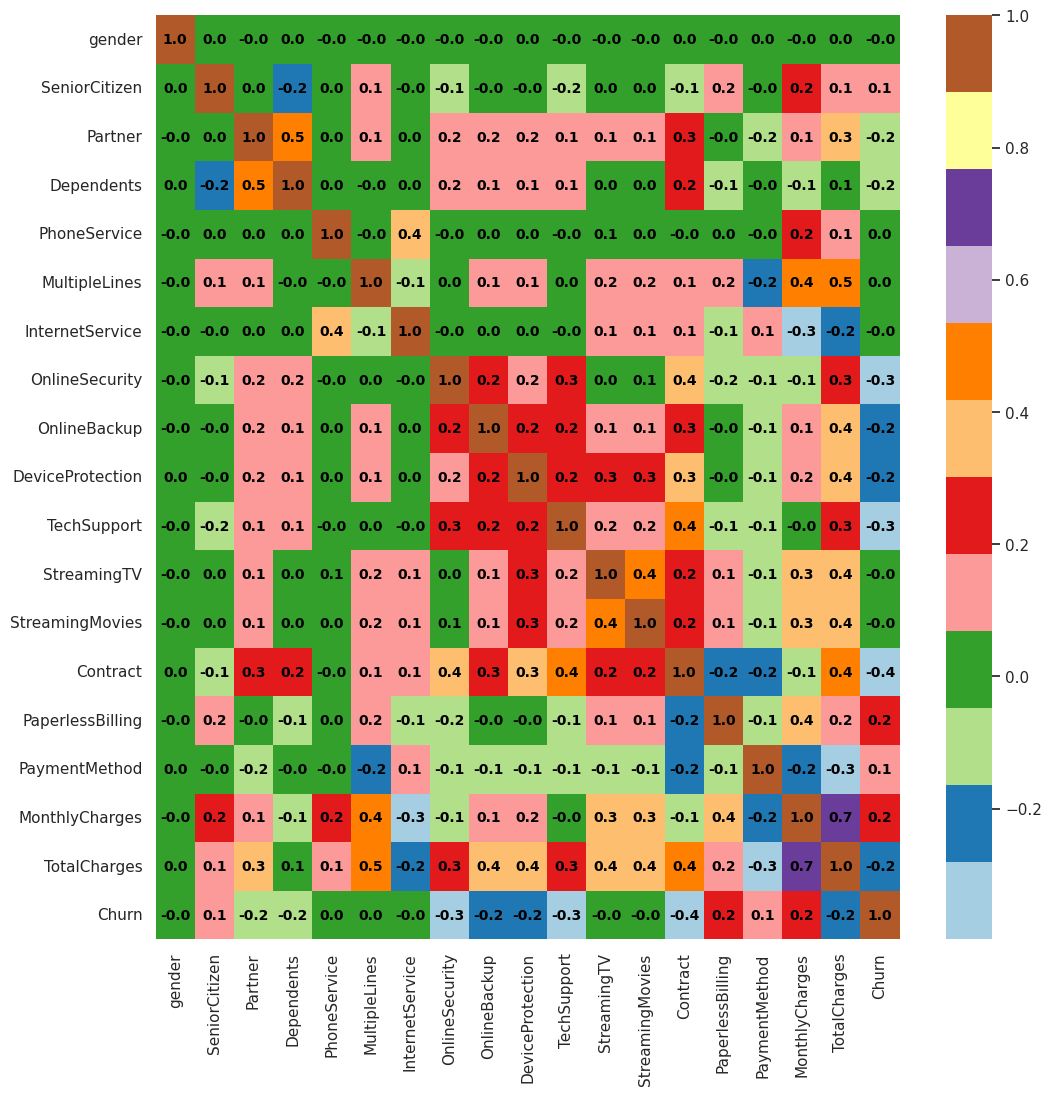

In [ ]:
plt.figure(figsize=(12,12))
# Generate the heatmap with annotations, rounded to single decimal place and displayed in uppercase
sns.heatmap(df_encoded.corr(), cmap="Paired", annot=True, fmt=".1f", annot_kws={"fontsize": 10, "fontweight": "bold", "color": 'black'})
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to "TotalCharges" and "MonthlyCharges"
df_encoded[['TotalCharges', 'MonthlyCharges']] = scaler.fit_transform(df_encoded[['TotalCharges', 'MonthlyCharges']])

# Display the scaled DataFrame
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.001275,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.215867,0
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.010310,1
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1


# **Feature selection**

In [ ]:
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.001275,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.215867,0
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.010310,1
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1


In [ ]:
import scipy.stats as stats

# Calculate Pearson correlation coefficient and p-value for each feature with "churn"
correlation_results = df_encoded.corrwith(df_encoded['Churn'])

# Create a DataFrame from the correlation results
correlation_df = pd.DataFrame({'Pearson Correlation Coefficient': correlation_results})

# Compute the p-values
p_values = df_encoded.apply(lambda x: stats.pearsonr(x, df_encoded['Churn'])[1])
correlation_df['p-value'] = p_values

# Display the correlation results
print(correlation_df)

                  Pearson Correlation Coefficient        p-value
gender                                  -0.008851   4.607298e-01
SeniorCitizen                            0.149499   5.136448e-36
Partner                                 -0.151735   4.620134e-37
Dependents                              -0.163879   5.043616e-43
PhoneService                             0.011883   3.219944e-01
MultipleLines                            0.035752   2.877358e-03
InternetService                         -0.047886   6.520839e-05
OnlineSecurity                          -0.287723  1.529074e-132
OnlineBackup                            -0.196200   3.007471e-61
DeviceProtection                        -0.176018   1.833511e-49
TechSupport                             -0.282586  1.005450e-127
StreamingTV                             -0.035000   3.524981e-03
StreamingMovies                         -0.039188   1.086335e-03
Contract                                -0.397820  3.336669e-262
PaperlessBilling         

In [ ]:
# Filter variables with correlation coefficient of 0.1 and above
correlation_df_filtered = correlation_df[correlation_df['Pearson Correlation Coefficient'].abs() >= 0.1]

# Display the correlation results for selected variables
print(correlation_df_filtered)

                  Pearson Correlation Coefficient        p-value
SeniorCitizen                            0.149499   5.136448e-36
Partner                                 -0.151735   4.620134e-37
Dependents                              -0.163879   5.043616e-43
OnlineSecurity                          -0.287723  1.529074e-132
OnlineBackup                            -0.196200   3.007471e-61
DeviceProtection                        -0.176018   1.833511e-49
TechSupport                             -0.282586  1.005450e-127
Contract                                -0.397820  3.336669e-262
PaperlessBilling                         0.192557   5.086987e-59
PaymentMethod                            0.107754   2.128638e-19
MonthlyCharges                           0.193872   8.084585e-60
TotalCharges                            -0.199794   1.722238e-63
Churn                                    1.000000   0.000000e+00


In [ ]:
# Features with correlation coefficient greater than or equal to 0.1 or less than or equal to -0.1
selected_features = ['SeniorCitizen', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup',
                     'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
                     'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

# Create X (features) and Y (target variable)
X = df_encoded[selected_features]
Y = df_encoded['Churn']

# ***Train Test Split***

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", Y_train.shape)
print("y_test shape:", Y_test.shape)

X_train shape: (5558, 12)
X_test shape: (1390, 12)
y_train shape: (5558,)
y_test shape: (1390,)


# **Model Selection and Training**

## ***Model 1: RANDOM FOREST CLASSIFIER***

## ***Model 1: Training***

In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100,
                                  criterion='gini',
                                  random_state = 100,
                                  max_depth=6,
                                  min_samples_leaf=8)

# Train the model
rf_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = rf_model.predict(X_test)

## ***Model 1: Evaluation***

### ***Accuracy Score***

In [ ]:
# Evaluate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy on Random Forest Classifier: {accuracy:.4f}')

Accuracy on Random Forest Classifier: 0.8043


### ***Classification report***

In [ ]:
# Generate and display the classification report
class_report = classification_report(Y_test, Y_pred)
print('Classification Report (Random Forest Classifier):\n', class_report)

Classification Report (Random Forest Classifier):
               precision    recall  f1-score   support

           0       0.84      0.92      0.87      1035
           1       0.66      0.47      0.55       355

    accuracy                           0.80      1390
   macro avg       0.75      0.70      0.71      1390
weighted avg       0.79      0.80      0.79      1390



### ***Confusion matrix***

In [ ]:
# Generate and display the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual No Churn', 'Actual Churn'], columns=['Predicted No Churn', 'Predicted Churn'])
print('Confusion Matrix (Random Forest Classifier):\n', conf_matrix_df)

Confusion Matrix (Random Forest Classifier):
                  Predicted No Churn  Predicted Churn
Actual No Churn                 950               85
Actual Churn                    187              168


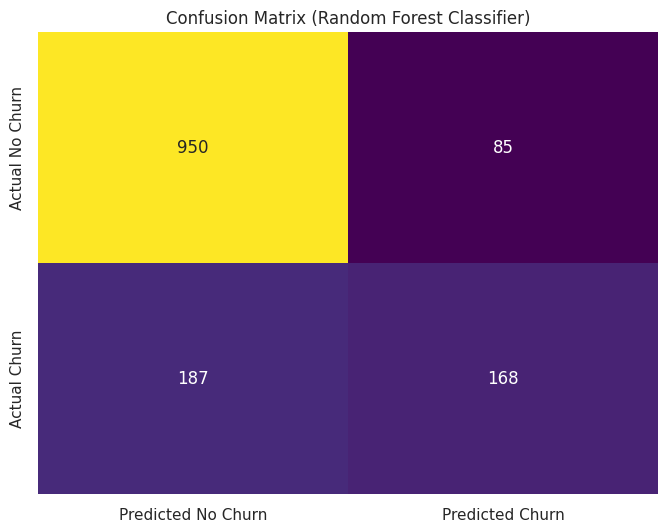

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='viridis', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix (Random Forest Classifier)')
plt.show()

## ***Model 2: LOGISTIC REGRESSION***

## ***Model 2: Training***

In [ ]:
# Initialize the Logistic Regression model
lr_model = LogisticRegression(random_state=42,
                              max_iter=1000)

# Train the model
lr_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_lr = lr_model.predict(X_test)

## ***Model 2: Evaluation***

### ***Accuracy Score***

In [ ]:
# Evaluate accuracy
accuracy_lr = accuracy_score(Y_test, Y_pred_lr)
print(f'Accuracy on Logistic Regression: {accuracy_lr:.4f}')

Accuracy on Logistic Regression: 0.8022


### ***Classification report***

In [ ]:
# Generate and display the classification report
class_report_lr = classification_report(Y_test, Y_pred_lr)
print('Classification Report (Logistic Regression):\n', class_report_lr)

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.63      0.56      0.59       355

    accuracy                           0.80      1390
   macro avg       0.74      0.72      0.73      1390
weighted avg       0.80      0.80      0.80      1390



### ***Confusion matrix***

In [ ]:
# Generate and display the confusion matrix
conf_matrix_lr = confusion_matrix(Y_test, Y_pred_lr)
conf_matrix_df_lr = pd.DataFrame(conf_matrix_lr, index=['Actual No Churn', 'Actual Churn'], columns=['Predicted No Churn', 'Predicted Churn'])
print('Confusion Matrix (Logistic Regression):\n', conf_matrix_df_lr)

Confusion Matrix (Logistic Regression):
                  Predicted No Churn  Predicted Churn
Actual No Churn                 917              118
Actual Churn                    157              198


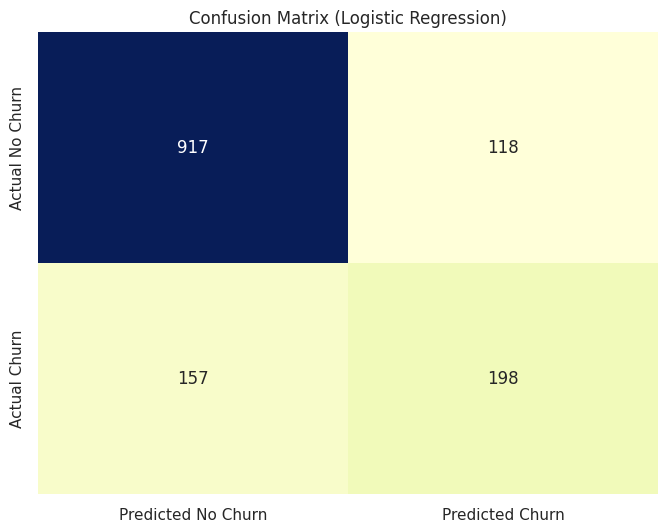

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df_lr, annot=True, fmt='d', cmap='YlGnBu', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

## ***Model 3: GRADIENT BOOSTING CLASSIFER***

## ***Model 3: Training***

In [ ]:
# Initialize the Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_gb = gb_model.predict(X_test)

## ***Model 3: Evaluation***

### ***Accuracy Score***

In [ ]:
# Evaluate accuracy
accuracy_gb = accuracy_score(Y_test, Y_pred_gb)
print(f'Accuracy on Gradient Boosting Classifier: {accuracy_gb:.4f}')

Accuracy on Gradient Boosting Classifier: 0.8144


### ***Classification report***

In [ ]:
# Generate and display the classification report
class_report_gb = classification_report(Y_test, Y_pred_gb)
print('Classification Report (Gradient Boosting Classifier):\n', class_report_gb)

Classification Report (Gradient Boosting Classifier):
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1035
           1       0.67      0.55      0.60       355

    accuracy                           0.81      1390
   macro avg       0.76      0.73      0.74      1390
weighted avg       0.81      0.81      0.81      1390



### ***Confusion matrix***

In [ ]:
# Generate and display the confusion matrix
conf_matrix_gb = confusion_matrix(Y_test, Y_pred_gb)
conf_matrix_df_gb = pd.DataFrame(conf_matrix_gb, index=['Actual No Churn', 'Actual Churn'], columns=['Predicted No Churn', 'Predicted Churn'])
print('Confusion Matrix (Gradient Boosting Classifier):\n', conf_matrix_df_gb)

Confusion Matrix (Gradient Boosting Classifier):
                  Predicted No Churn  Predicted Churn
Actual No Churn                 937               98
Actual Churn                    160              195


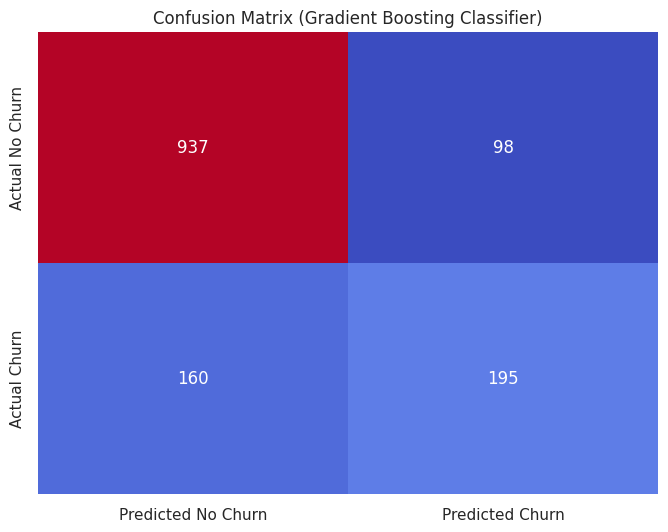

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df_gb, annot=True, fmt='d', cmap='coolwarm', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix (Gradient Boosting Classifier)')
plt.show()

## ***Model 4: DECISION TREE CLASSIFER***

In [ ]:
# Initialize the model
dt_model = DecisionTreeClassifier(criterion="gini",
                                  random_state=100,
                                  max_depth=6,
                                  min_samples_leaf=8)

# Train the model
dt_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_dt = dt_model.predict(X_test)

## ***Model 4: Evaluation***

### ***Accuracy Score***

In [ ]:
# Evaluate accuracy
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
print(f'Accuracy on Decision Tree Classifier: {accuracy_dt:.4f}')

Accuracy on Decision Tree Classifier: 0.7950


### ***Classification report***

In [ ]:
# Classification Report
class_report_dt = classification_report(Y_test, Y_pred_dt)
print('Classification Report (Decision Tree Classifier):\n', class_report_dt)

Classification Report (Decision Tree Classifier):
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1035
           1       0.61      0.57      0.59       355

    accuracy                           0.79      1390
   macro avg       0.73      0.72      0.72      1390
weighted avg       0.79      0.79      0.79      1390



### ***Confusion matrix***

In [ ]:
# Confusion Matrix
conf_matrix_dt = confusion_matrix(Y_test, Y_pred_dt)
conf_matrix_df_dt = pd.DataFrame(conf_matrix_dt, index=['Actual No Churn', 'Actual Churn'], columns=['Predicted No Churn', 'Predicted Churn'])
print('Confusion Matrix (Decision Tree Classifier):\n', conf_matrix_df_dt)

Confusion Matrix (Decision Tree Classifier):
                  Predicted No Churn  Predicted Churn
Actual No Churn                 904              131
Actual Churn                    154              201


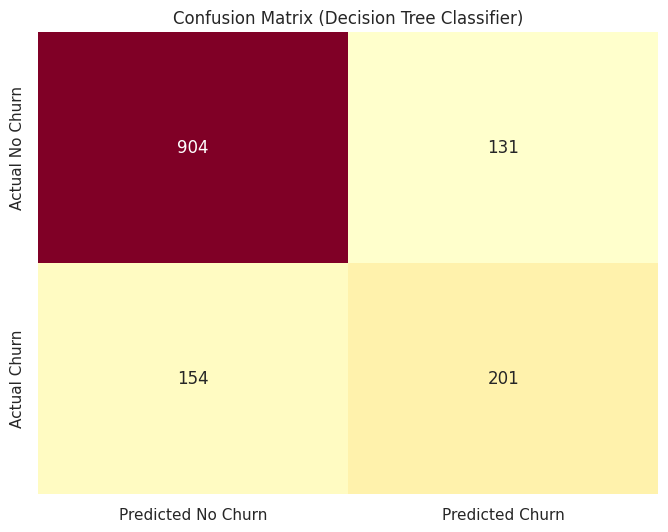

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df_dt, annot=True, fmt='d', cmap='YlOrRd', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix (Decision Tree Classifier)')
plt.show()

As we noticed the Gradient Boosting Classifier perfroms the best with accuracy of 80%,

But we can see that the accuracy is quite low, and as it's an imbalanced dataset.
Also the recall, precision & f1 score for the minority class is aslo too low (for Class 1, i.e. churned customers.)
Hence, moving ahead to use SMOTEENN (UpSampling + ENN) and then see the results.

# ***SMOTEEN***

**SMOTEEN combines SMOTE (Synthetic Minority Over-sampling Technique) for generating synthetic instances of the minority class with Edited Nearest Neighbors (ENN) for cleaning the dataset. This dual approach effectively addresses class imbalance, enhancing the performance of machine learning models in predicting minority class outcomes.**

In [ ]:
# Initialize SMOTEENN
sm = SMOTEENN()

# Apply SMOTEENN to the training data only
X_resampled, y_resampled = sm.fit_resample(X,Y)

In [ ]:
# Assuming X_resampled is a pandas DataFrame
feature_column_names = X_resampled.columns.tolist()

# Print or use the feature column names as needed
print("Feature Column Names:", feature_column_names)


Feature Column Names: ['SeniorCitizen', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


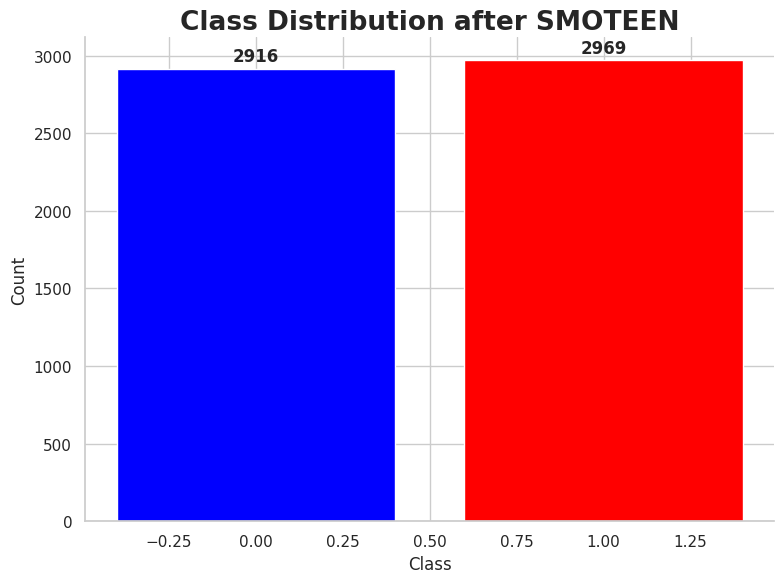

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_resampled and y_resampled are the balanced features and labels

# Combine X_resampled and y_resampled into a single DataFrame for easier plotting
import pandas as pd
df_resampled = pd.DataFrame(X_resampled, columns= feature_column_names)
df_resampled['target'] = y_resampled

# Get the value counts for the target column (assuming binary classification)
data_temp = df_resampled['target'].value_counts().sort_index()

# Create a bar chart with annotations and different colors
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(data_temp.index, data_temp, color=['blue', 'red'])

# Title and axis labels
ax.set_title('Class Distribution after SMOTEEN', fontsize=19, fontweight='bold')
ax.set_xlabel('Class')
ax.set_ylabel('Count')

# Annotate each bar with its count value
for i, count in enumerate(data_temp):
    ax.text(i, count + 50, str(count), ha='center', fontsize=12, fontweight='bold')

# Remove spines on top and right sides
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Calculate churn counts and percentages
churn_counts = df_resampled['target'].value_counts()
churn_percentages = churn_counts / len(df['Churn']) * 100

# Display churn counts
print("Churn counts:")
print(churn_counts)

# Display churn percentages
print("\nChurn percentages:")
print(churn_percentages.rename('Percentage'))

# Display total churned customers
total_churned_customers = churn_counts.sum()
print(f"\nTotal churned customers: {total_churned_customers} out of {len(df)} ({total_churned_customers / len(df) * 100:.2f}%)")


Churn counts:
target
1    2969
0    2916
Name: count, dtype: int64

Churn percentages:
target
1    42.731721
0    41.968912
Name: Percentage, dtype: float64

Total churned customers: 5885 out of 6948 (84.70%)


# ***Train Test Split after SMOTEEN***

In [ ]:
xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled,test_size=0.2)

# ***LOGISTIC REGRESSION***

## ***Model Training***

In [ ]:
# Initialize the Logistic Regression model
lr_model = LogisticRegression(random_state=42,
                              max_iter=1000)

# Train the model
lr_model.fit(xr_train, yr_train)

# Make predictions on the test set
Y_pred_lr = lr_model.predict(xr_test)

## ***Model Evaluation***

### ***Accuracy Score***

In [ ]:
# Evaluate accuracy
accuracy_lr = accuracy_score(yr_test, Y_pred_lr)
print(f'Accuracy on Logistic Regression: {accuracy_lr:.4f}')

Accuracy on Logistic Regression: 0.9269


### ***Classification report***

In [ ]:
# Generate and display the classification report
class_report_lr = classification_report(yr_test, Y_pred_lr)
print('Classification Report (Logistic Regression):\n', class_report_lr)

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       574
           1       0.92      0.94      0.93       603

    accuracy                           0.93      1177
   macro avg       0.93      0.93      0.93      1177
weighted avg       0.93      0.93      0.93      1177



### ***Confusion matrix***

In [ ]:
# Generate and display the confusion matrix
conf_matrix_lr = confusion_matrix(yr_test, Y_pred_lr)
conf_matrix_df_lr = pd.DataFrame(conf_matrix_lr, index=['Actual No Churn', 'Actual Churn'], columns=['Predicted No Churn', 'Predicted Churn'])
print('Confusion Matrix (Logistic Regression):\n', conf_matrix_df_lr)

Confusion Matrix (Logistic Regression):
                  Predicted No Churn  Predicted Churn
Actual No Churn                 523               51
Actual Churn                     35              568


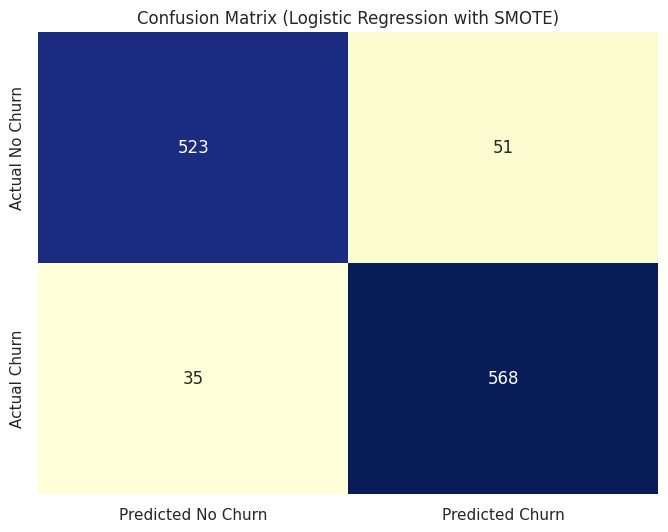

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df_lr, annot=True, fmt='d', cmap='YlGnBu', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix (Logistic Regression with SMOTE)')
plt.show()

# ***DECISION TREE CLASSIFIER***

## ***Model Training***

In [ ]:
# Initialize the model
model_dt_smote = DecisionTreeClassifier(criterion="gini",
                                        random_state=100,
                                        max_depth=6,
                                        min_samples_leaf=8)

# Train the model
model_dt_smote.fit(xr_train,yr_train)

# Make predictions on the test set
Y_pred_dt_smote = model_dt_smote.predict(xr_test)

## ***Model Evaluation***

### ***Accuracy Score***

In [ ]:
# Evaluate accuracy
accuracy_dt = accuracy_score(yr_test, Y_pred_dt_smote)
print(f'Accuracy on Decision Tree Classifier: {accuracy_dt:.4f}')

Accuracy on Decision Tree Classifier: 0.9244


### ***Classification Report***

In [ ]:
# Classification Report
class_report_dt_smote = classification_report(yr_test, Y_pred_dt_smote)
print('Classification Report (Decision Tree Classifier):\n', class_report_dt_smote)

Classification Report (Decision Tree Classifier):
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       574
           1       0.91      0.94      0.93       603

    accuracy                           0.92      1177
   macro avg       0.93      0.92      0.92      1177
weighted avg       0.92      0.92      0.92      1177



### ***Confusion Matrix***

In [ ]:
# Confusion Matrix
conf_matrix_dt_smote = confusion_matrix(yr_test, Y_pred_dt_smote)
conf_matrix_df_dt_smote = pd.DataFrame(conf_matrix_dt_smote, index=['Actual No Churn', 'Actual Churn'], columns=['Predicted No Churn', 'Predicted Churn'])
print('Confusion Matrix (Decision Tree Classifier):\n', conf_matrix_df_dt_smote)

Confusion Matrix (Decision Tree Classifier):
                  Predicted No Churn  Predicted Churn
Actual No Churn                 520               54
Actual Churn                     35              568


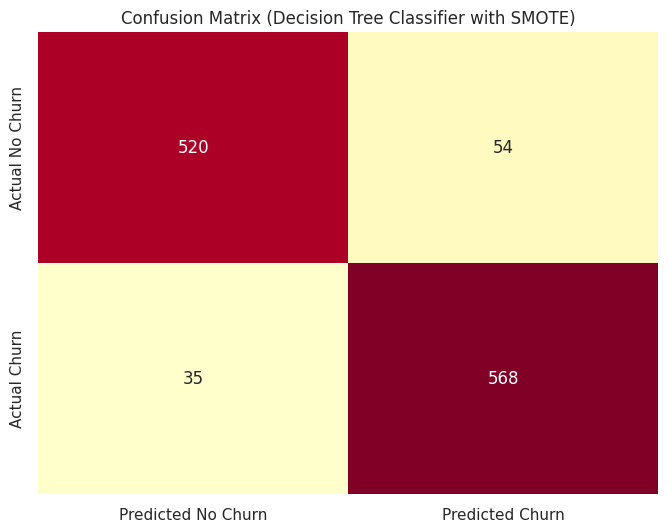

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df_dt_smote, annot=True, fmt='d', cmap='YlOrRd', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix (Decision Tree Classifier with SMOTE)')
plt.show()

# ***GRADIENT BOOSTING CLASSIFER***

## ***Model Training***

In [ ]:
# Initialize the Gradient Boosting Classifier model
gb_model_smote = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model_smote.fit(xr_train, yr_train)

# Make predictions on the test set
Y_pred_gb_smote = gb_model.predict(xr_test)

## ***Model: Evaluation***

### ***Accuracy Score***

In [ ]:
# Evaluate accuracy
accuracy_gb = accuracy_score(yr_test, Y_pred_gb_smote)
print(f'Accuracy on Gradient Boosting Classifier: {accuracy_gb:.4f}')

Accuracy on Gradient Boosting Classifier: 0.8352


### ***Classification report***

In [ ]:
# Generate and display the classification report
class_report_gb_smote = classification_report(yr_test, Y_pred_gb_smote)
print('Classification Report (Gradient Boosting Classifier):\n', class_report_gb_smote)

Classification Report (Gradient Boosting Classifier):
               precision    recall  f1-score   support

           0       0.75      1.00      0.86       574
           1       1.00      0.68      0.81       603

    accuracy                           0.84      1177
   macro avg       0.87      0.84      0.83      1177
weighted avg       0.87      0.84      0.83      1177



### ***Confusion matrix***

In [ ]:
# Generate and display the confusion matrix
conf_matrix_gb = confusion_matrix(yr_test, Y_pred_gb_smote)
conf_matrix_df_gb_smote = pd.DataFrame(conf_matrix_gb, index=['Actual No Churn', 'Actual Churn'], columns=['Predicted No Churn', 'Predicted Churn'])
print('Confusion Matrix (Gradient Boosting Classifier):\n', conf_matrix_df_gb_smote)

Confusion Matrix (Gradient Boosting Classifier):
                  Predicted No Churn  Predicted Churn
Actual No Churn                 572                2
Actual Churn                    192              411


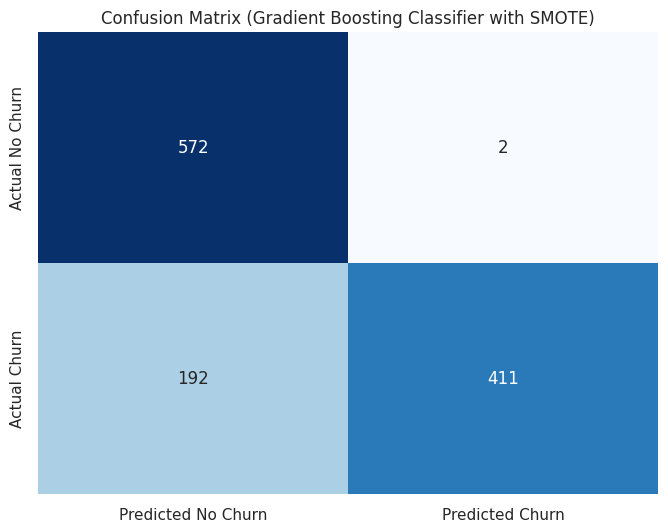

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df_gb_smote, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix (Gradient Boosting Classifier with SMOTE)')
plt.show()

# ***RANDOM FOREST CLASSIFIER***

## ***Model Training***

In [ ]:
# Initialize the Random Forest model
rf_model_smote = RandomForestClassifier(n_estimators=100,
                                  criterion='gini',
                                  random_state = 100,
                                  max_depth=6,
                                  min_samples_leaf=8)

# Train the model
rf_model_smote.fit(xr_train,yr_train)

# Make predictions on the test set
Y_pred_rf_smote = rf_model_smote.predict(xr_test)

## ***Model Evaluation***

### ***Accuracy Score***

In [ ]:
# Evaluate accuracy
accuracy = accuracy_score(yr_test, Y_pred_rf_smote)
print(f'Accuracy on Random Forest Classifier: {accuracy:.4f}')

Accuracy on Random Forest Classifier: 0.9261


### ***Classification report***

In [ ]:
# Generate and display the classification report
class_report = classification_report(yr_test, Y_pred_rf_smote)
print('Classification Report (Random Forest Classifier):\n', class_report)

Classification Report (Random Forest Classifier):
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       574
           1       0.92      0.94      0.93       603

    accuracy                           0.93      1177
   macro avg       0.93      0.93      0.93      1177
weighted avg       0.93      0.93      0.93      1177



### ***Confusion matrix***

In [ ]:
# Generate and display the confusion matrix
conf_matrix_rf = confusion_matrix(yr_test, Y_pred_rf_smote)
conf_matrix_rf_smote = pd.DataFrame(conf_matrix_rf, index=['Actual No Churn', 'Actual Churn'], columns=['Predicted No Churn', 'Predicted Churn'])
print('Confusion Matrix (Random Forest Classifier):\n', conf_matrix_rf_smote)

Confusion Matrix (Random Forest Classifier):
                  Predicted No Churn  Predicted Churn
Actual No Churn                 523               51
Actual Churn                     36              567


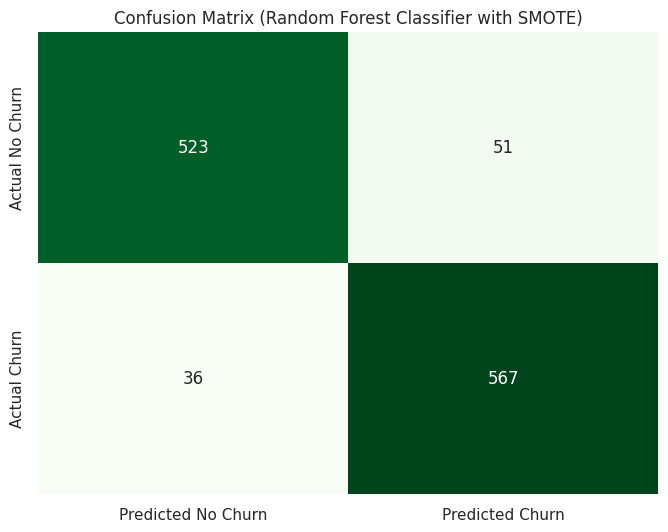

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_smote, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix (Random Forest Classifier with SMOTE)')
plt.show()